In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [144]:
data=pd.read_csv('car_data.csv')

In [145]:
data.head(10)

,Avtosalon,Qiymet,Valyuta,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,...,Yeni,Vəziyyəti,Yeniləndi,Baxışların sayı,Extra,Etrafli,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı
0,0,13500,AZN,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənib",28.05.2023,267,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",Salam Barter mümkündür. 1.6 sadə mator mexanik...,2,Avropa,5,NaN
1,1,23500,USD,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,...,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,12410,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",TOYOTA CAROLLA 2023 ALIŞ. 2 İL 80.000 KM ZƏMAN...,1,Rəsmi diler,5,NaN
2,0,33200,AZN,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,148,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Yeni gelib bakida surlmuyb qiymet mawin yanind...,1,Avropa,7,NaN
3,0,17000,AZN,Bakı,Ford,Fusion,2015,Sedan,Göy,1.5 L/181 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",25.05.2023,3358,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Maşın xanım tərəfindən idarə olunub,NaN,NaN,NaN,NaN
4,0,36000,USD,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,2.0 L/173 a.g./Benzin,...,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,16183,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Rəsmi dilerdən 10 il və ya 160.000 km zəmanəti...,1,NaN,5,NaN
5,0,25000,AZN,Bakı,Mercedes,E 200,2007,Sedan,Gümüşü,1.8 L/184 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,1141,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Avtomobil Almaniyadan yeni gelib. Ideal veziyy...,NaN,Avropa,NaN,NaN
6,0,27900,AZN,Bakı,Chevrolet,Equinox,2017,Offroader / SUV,Tünd qırmızı,1.5 L/170 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",26.05.2023,128,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Azerbaycana yeni gelib hec bir xerc teleb etmi...,1,Amerika,5,NaN
7,0,13400,AZN,Bakı,Opel,Astra,2009,Hetçbek,Boz,1.4 L/90 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,1282,"Yüngül lehimli disklər, ABS, Mərkəzi qapanma, ...",Almanyadan yeni gelib Gömrük olnub nömre alnib...,NaN,NaN,NaN,NaN
8,0,26500,USD,Bakı,BMW,520,2016,Sedan,Göy,2.0 L/184 a.g./Dizel,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",26.05.2023,9807,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Masin idial veziyyetdedi hec bir prablemi yoxd...,NaN,Koreya,5,NaN
9,0,13500,AZN,Bakı,Chevrolet,Cruze,2012,Sedan,Ağ,1.6 L/124 a.g./Benzin,...,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,6478,"Yüngül lehimli disklər, ABS, Mərkəzi qapanma, ...",MAŞIN ÇOX TƏCİLİ SATILIR!!! Maşın rəsmi servis...,1,Rəsmi diler,4,NaN


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Avtosalon                 10000 non-null  int64 
 1   Qiymet                    10000 non-null  int64 
 2   Valyuta                   10000 non-null  object
 3   Şəhər                     10000 non-null  object
 4   Marka                     10000 non-null  object
 5   Model                     10000 non-null  object
 6   Buraxılış ili             10000 non-null  int64 
 7   Ban növü                  10000 non-null  object
 8   Rəng                      10000 non-null  object
 9   Mühərrik                  10000 non-null  object
 10  Yürüş                     10000 non-null  object
 11  Sürətlər qutusu           10000 non-null  object
 12  Ötürücü                   10000 non-null  object
 13  Yeni                      10000 non-null  object
 14  Vəziyyəti              

In [147]:
data.describe()

,Avtosalon,Qiymet,Buraxılış ili,Baxışların sayı
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.25370,27318.521400,2010.067900,4328.818800
std,0.43515,28995.789851,8.386246,13383.511716
min,0.00000,1100.000000,1938.000000,41.000000
25%,0.00000,12700.000000,2006.000000,408.750000
50%,0.00000,21000.000000,2011.000000,1164.500000
75%,1.00000,32500.000000,2015.000000,3500.250000
max,1.00000,850000.000000,2023.000000,334547.000000


In [148]:
data.shape

(10000, 23)

Data Cleaning and Preprocessing

In [149]:
data.isnull().sum()

,0
Avtosalon,0
Qiymet,0
Valyuta,0
Şəhər,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Mühərrik,0


In [150]:
data = data.drop(columns = ['Qəzalı', 'Yeniləndi', 'Yeni', 'Baxışların sayı', 'Avtosalon', 'Hansı bazar üçün yığılıb','Etrafli','Extra','Sahiblər','Şəhər'])

In [151]:
data.columns

Index(['Qiymet', 'Valyuta', 'Marka', 'Model', 'Buraxılış ili', 'Ban növü',
       'Rəng', 'Mühərrik', 'Yürüş', 'Sürətlər qutusu', 'Ötürücü', 'Vəziyyəti',
       'Yerlərin sayı'],
      dtype='object')

In [152]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Mühərrik,0
Yürüş,0
Sürətlər qutusu,0


In [153]:
data['Vəziyyəti'].value_counts()

,count
Vəziyyəti,
"Vuruğu yoxdur, rənglənməyib",9157
"Vuruğu yoxdur, rənglənib",696
"Vuruğu var, rənglənib",73
"Vuruğu var, rənglənməyib",46


In [154]:
data=data.dropna(subset=["Vəziyyəti"])

In [155]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Mühərrik,0
Yürüş,0
Sürətlər qutusu,0


In [156]:
data['Yerlərin sayı'].value_counts()

,count
Yerlərin sayı,
5,4372
7,1193
4,831
3,187
2,115
8+,74
6,40
1,19


In [157]:
# Fill missing values with the mode (most frequent value: '5')
data["Yerlərin sayı"].fillna("5", inplace=True)

data["Yerlərin sayı"] = data["Yerlərin sayı"].replace("8+", "8")
data["Yerlərin sayı"] = data["Yerlərin sayı"].astype(int)


<ipython-input-157-1c56eec9e67a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Yerlərin sayı"].fillna("5", inplace=True)


In [158]:
data.isnull().sum()

,0
Qiymet,0
Valyuta,0
Marka,0
Model,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Mühərrik,0
Yürüş,0
Sürətlər qutusu,0


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9972 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Qiymet           9972 non-null   int64 
 1   Valyuta          9972 non-null   object
 2   Marka            9972 non-null   object
 3   Model            9972 non-null   object
 4   Buraxılış ili    9972 non-null   int64 
 5   Ban növü         9972 non-null   object
 6   Rəng             9972 non-null   object
 7   Mühərrik         9972 non-null   object
 8   Yürüş            9972 non-null   object
 9   Sürətlər qutusu  9972 non-null   object
 10  Ötürücü          9972 non-null   object
 11  Vəziyyəti        9972 non-null   object
 12  Yerlərin sayı    9972 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [160]:
data['Mühərrik'].value_counts()

,count
Mühərrik,
2.0 L/184 a.g./Dizel,502
1.6 L/75 a.g./Benzin,320
2.0 L/245 a.g./Benzin,264
1.5 L/76 a.g./Hibrid,180
1.4 L/90 a.g./Benzin,169
...,...
3.3 L/242 a.g./Benzin,1
3.0 L/170 a.g./Dizel,1
3.5 L/250 a.g./Benzin,1


In [161]:
# Split only engine volume and fuel type
data[["Motor_Hecmi", "Yanacaq_Novu"]] = data["Mühərrik"].str.extract(r"(\d+\.\d+)\s*L/\d+\s*a\.g\./(.+)")

data["Motor_Hecmi"] = data["Motor_Hecmi"].astype(float)
data["Yanacaq_Novu"] = data["Yanacaq_Novu"].str.strip()

data.drop(columns=["Mühərrik"], inplace=True)

In [162]:
data.head(20)

,Qiymet,Valyuta,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Vəziyyəti,Yerlərin sayı,Motor_Hecmi,Yanacaq_Novu
0,13500,AZN,Opel,Vectra,2000,Hetçbek,Göy,370 000 km,Mexaniki,Ön,"Vuruğu yoxdur, rənglənib",5,1.6,Benzin
1,23500,USD,Toyota,Corolla,2023,Sedan,Mavi,0 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,1.8,Hibrid
2,33200,AZN,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168 636 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",7,2.0,Dizel
3,17000,AZN,Ford,Fusion,2015,Sedan,Göy,120 873 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,1.5,Benzin
4,36000,USD,Toyota,RAV4,2022,Offroader / SUV,Qara,0 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,2.0,Benzin
5,25000,AZN,Mercedes,E 200,2007,Sedan,Gümüşü,204 000 km,Avtomat,Arxa,"Vuruğu yoxdur, rənglənməyib",5,1.8,Benzin
6,27900,AZN,Chevrolet,Equinox,2017,Offroader / SUV,Tünd qırmızı,45 000 km,Avtomat,Tam,"Vuruğu yoxdur, rənglənməyib",5,1.5,Benzin
7,13400,AZN,Opel,Astra,2009,Hetçbek,Boz,153 896 km,Mexaniki,Ön,"Vuruğu yoxdur, rənglənməyib",5,1.4,Benzin
8,26500,USD,BMW,520,2016,Sedan,Göy,135 000 km,Avtomat,Arxa,"Vuruğu yoxdur, rənglənməyib",5,2.0,Dizel
9,13500,AZN,Chevrolet,Cruze,2012,Sedan,Ağ,150 000 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",4,1.6,Benzin


In [163]:
def convert_usd_to_azn(data, rate=1.7):

    data.loc[data["Valyuta"] == "USD", "Qiymet"] = data.loc[data["Valyuta"] == "USD", "Qiymet"] * rate

    data.drop(columns=["Valyuta"], inplace=True)

    return data

data = convert_usd_to_azn(data)


<ipython-input-163-ef64550508c0>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 39950.  61200.  45050. ...  51000.  38930. 166600.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["Valyuta"] == "USD", "Qiymet"] = data.loc[data["Valyuta"] == "USD", "Qiymet"] * rate


In [164]:
data

,Qiymet,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Vəziyyəti,Yerlərin sayı,Motor_Hecmi,Yanacaq_Novu
0,13500.0,Opel,Vectra,2000,Hetçbek,Göy,370 000 km,Mexaniki,Ön,"Vuruğu yoxdur, rənglənib",5,1.6,Benzin
1,39950.0,Toyota,Corolla,2023,Sedan,Mavi,0 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,1.8,Hibrid
2,33200.0,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168 636 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",7,2.0,Dizel
3,17000.0,Ford,Fusion,2015,Sedan,Göy,120 873 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,1.5,Benzin
4,61200.0,Toyota,RAV4,2022,Offroader / SUV,Qara,0 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,2.0,Benzin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,BMW,528,2016,Sedan,Qara,100 000 km,Avtomat,Arxa,"Vuruğu yoxdur, rənglənməyib",5,2.0,Benzin
9996,166600.0,Land Rover,Range Rover,2019,Offroader / SUV,Qara,84 000 km,Avtomat,Tam,"Vuruğu yoxdur, rənglənməyib",5,3.0,Benzin
9997,9800.0,Chevrolet,Lacetti,2007,Sedan,Gümüşü,299 785 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,1.6,Benzin
9998,17800.0,Hyundai,Tucson,2007,Offroader / SUV,Gümüşü,181 500 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,2.0,Dizel


In [165]:
data["Brand_Model"] = data["Marka"] + " " + data["Model"]

data.drop(columns=["Marka", "Model"], inplace=True)

In [166]:
data

,Qiymet,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Vəziyyəti,Yerlərin sayı,Motor_Hecmi,Yanacaq_Novu,Brand_Model
0,13500.0,2000,Hetçbek,Göy,370 000 km,Mexaniki,Ön,"Vuruğu yoxdur, rənglənib",5,1.6,Benzin,Opel Vectra
1,39950.0,2023,Sedan,Mavi,0 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,1.8,Hibrid,Toyota Corolla
2,33200.0,2013,Offroader / SUV,Qara,168 636 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",7,2.0,Dizel,Hyundai Santa Fe
3,17000.0,2015,Sedan,Göy,120 873 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,1.5,Benzin,Ford Fusion
4,61200.0,2022,Offroader / SUV,Qara,0 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,2.0,Benzin,Toyota RAV4
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,2016,Sedan,Qara,100 000 km,Avtomat,Arxa,"Vuruğu yoxdur, rənglənməyib",5,2.0,Benzin,BMW 528
9996,166600.0,2019,Offroader / SUV,Qara,84 000 km,Avtomat,Tam,"Vuruğu yoxdur, rənglənməyib",5,3.0,Benzin,Land Rover Range Rover
9997,9800.0,2007,Sedan,Gümüşü,299 785 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,1.6,Benzin,Chevrolet Lacetti
9998,17800.0,2007,Offroader / SUV,Gümüşü,181 500 km,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,2.0,Dizel,Hyundai Tucson


In [167]:
import re

def clean_yurus(value):
    if pd.isna(value):
        return np.nan
    text = str(value).lower().strip()

    text = text.replace("km", "").replace(" ", "")

    if 'min' in text:

        numbers = re.findall(r"[\d\.]+", text)
        if numbers:
            try:
                num = float(numbers[0].replace(',', '.'))
                return num * 1000
            except:
                return np.nan
        else:
            return np.nan
    else:

        try:
            return float(text.replace(',', '.'))
        except:
            return np.nan

data["Yurus_Clean"] = data["Yürüş"].apply(clean_yurus)
print(data[["Yürüş", "Yurus_Clean"]].sample(10))



           Yürüş  Yurus_Clean
7232  368 000 km     368000.0
3589        0 km          0.0
4306        0 km          0.0
6887  178 000 km     178000.0
4572   95 000 km      95000.0
4253  728 000 km     728000.0
7056  150 000 km     150000.0
893    62 000 km      62000.0
4082  178 000 km     178000.0
2907  184 000 km     184000.0


In [168]:
data.drop(columns=["Yürüş"], inplace=True)
data.rename(columns={"Yurus_Clean": "Yürüş"}, inplace=True)

In [169]:
data

,Qiymet,Buraxılış ili,Ban növü,Rəng,Sürətlər qutusu,Ötürücü,Vəziyyəti,Yerlərin sayı,Motor_Hecmi,Yanacaq_Novu,Brand_Model,Yürüş
0,13500.0,2000,Hetçbek,Göy,Mexaniki,Ön,"Vuruğu yoxdur, rənglənib",5,1.6,Benzin,Opel Vectra,370000.0
1,39950.0,2023,Sedan,Mavi,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,1.8,Hibrid,Toyota Corolla,0.0
2,33200.0,2013,Offroader / SUV,Qara,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",7,2.0,Dizel,Hyundai Santa Fe,168636.0
3,17000.0,2015,Sedan,Göy,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,1.5,Benzin,Ford Fusion,120873.0
4,61200.0,2022,Offroader / SUV,Qara,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,2.0,Benzin,Toyota RAV4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,2016,Sedan,Qara,Avtomat,Arxa,"Vuruğu yoxdur, rənglənməyib",5,2.0,Benzin,BMW 528,100000.0
9996,166600.0,2019,Offroader / SUV,Qara,Avtomat,Tam,"Vuruğu yoxdur, rənglənməyib",5,3.0,Benzin,Land Rover Range Rover,84000.0
9997,9800.0,2007,Sedan,Gümüşü,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,1.6,Benzin,Chevrolet Lacetti,299785.0
9998,17800.0,2007,Offroader / SUV,Gümüşü,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,2.0,Dizel,Hyundai Tucson,181500.0


In [170]:
# Motor_Hecmi üçün qrup medianı ilə doldur, sonra ümumi medianla doldur
data["Motor_Hecmi"] = data.groupby("Brand_Model")["Motor_Hecmi"].transform(lambda x: x.fillna(x.median()))
median_val = data["Motor_Hecmi"].median()
data["Motor_Hecmi"].fillna(median_val, inplace=True)

# Yanacaq_Novu üçün qrupun ən çox təkrarlanan (mode) dəyəri ilə doldur, əgər yoxdursa "unknown"
def fill_mode(series):
    if series.mode().empty:
        return series.fillna("unknown")
    else:
        return series.fillna(series.mode()[0])

data["Yanacaq_Novu"] = data.groupby("Brand_Model")["Yanacaq_Novu"].transform(fill_mode)

# Yanacaq_Novu üçün yenə də qalan boşluqları "unknown" ilə doldur
data["Yanacaq_Novu"].fillna("unknown", inplace=True)


<ipython-input-170-7f7b6e429545>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Motor_Hecmi"].fillna(median_val, inplace=True)
<ipython-input-170-7f7b6e429545>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [171]:
data.isnull().sum()

,0
Qiymet,0
Buraxılış ili,0
Ban növü,0
Rəng,0
Sürətlər qutusu,0
Ötürücü,0
Vəziyyəti,0
Yerlərin sayı,0
Motor_Hecmi,0
Yanacaq_Novu,0


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9972 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Qiymet           9972 non-null   float64
 1   Buraxılış ili    9972 non-null   int64  
 2   Ban növü         9972 non-null   object 
 3   Rəng             9972 non-null   object 
 4   Sürətlər qutusu  9972 non-null   object 
 5   Ötürücü          9972 non-null   object 
 6   Vəziyyəti        9972 non-null   object 
 7   Yerlərin sayı    9972 non-null   int64  
 8   Motor_Hecmi      9972 non-null   float64
 9   Yanacaq_Novu     9972 non-null   object 
 10  Brand_Model      9972 non-null   object 
 11  Yürüş            9972 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1012.8+ KB


Correlation with Qiymet:
 Qiymet           1.000000
Buraxılış ili    0.434668
Motor_Hecmi      0.366831
Yerlərin sayı    0.146725
Yürüş           -0.278884
Name: Qiymet, dtype: float64


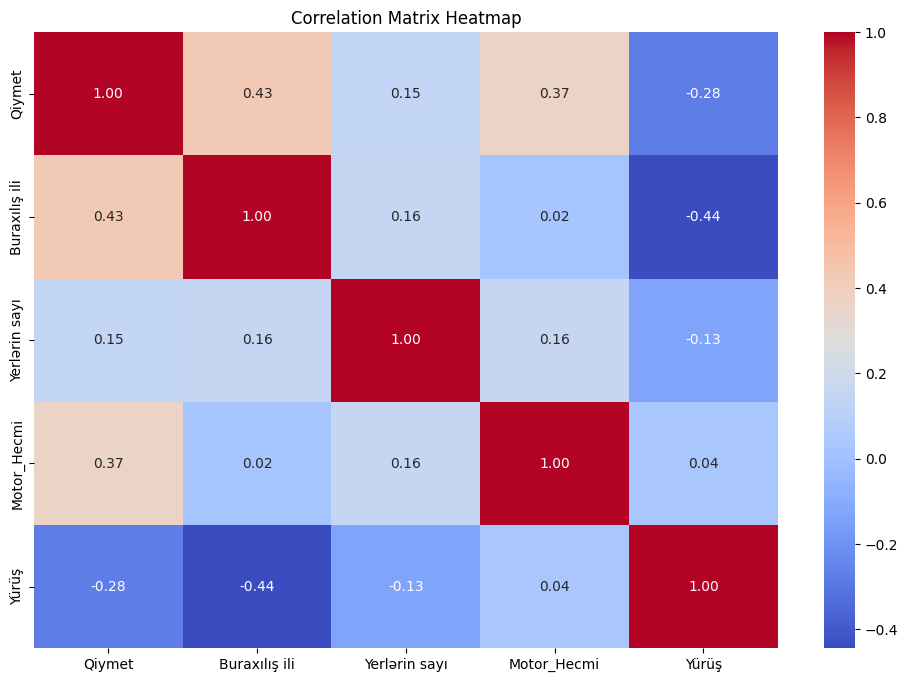

In [173]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = data[numeric_cols].corr()

target_corr = corr_matrix["Qiymet"].sort_values(ascending=False)
print("Correlation with Qiymet:\n", target_corr)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [174]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['Ban növü', 'Rəng', 'Sürətlər qutusu', 'Ötürücü', 'Vəziyyəti', 'Yanacaq_Novu', 'Brand_Model']


In [175]:
import pandas as pd

#Frequency Encoding for 'Brand_Model'
freq_encoding = data['Brand_Model'].value_counts().to_dict()
data['Brand_Model_FE'] = data['Brand_Model'].map(freq_encoding)

# One-Hot Encoding for nominal categorical columns
nominal_cols = ['Ban növü', 'Rəng', 'Sürətlər qutusu', 'Ötürücü', 'Yanacaq_Novu']
data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

# Label Encoding for 'Vəziyyəti' (ordinal-type categorical feature)
data['Vəziyyəti'] = data['Vəziyyəti'].map({
    'Vuruğu yoxdur, rənglənməyib': 3,
    'Vuruğu yoxdur, rənglənib': 2,
    'Vuruğu var, rənglənib': 1,
    'Vuruğu var, rənglənməyib': 0
})

# Drop original 'Brand_Model' column
data.drop(columns=['Brand_Model'], inplace=True)


print(f"Data shape after encoding: {data.shape}")

Data shape after encoding: (9972, 52)


In [176]:
data

,Qiymet,Buraxılış ili,Vəziyyəti,Yerlərin sayı,Motor_Hecmi,Yürüş,Brand_Model_FE,Ban növü_Dartqı,Ban növü_Furqon,Ban növü_Hetçbek,...,Sürətlər qutusu_Robotlaşdırılmış,Sürətlər qutusu_Variator,Ötürücü_Tam,Ötürücü_Ön,Yanacaq_Novu_Dizel,Yanacaq_Novu_Elektro,Yanacaq_Novu_Hibrid,Yanacaq_Novu_Plug-in Hibrid,Yanacaq_Novu_Qaz,Yanacaq_Novu_unknown
0,13500.0,2000,2,5,1.6,370000.0,69,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1,39950.0,2023,3,5,1.8,0.0,185,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,33200.0,2013,3,7,2.0,168636.0,336,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,17000.0,2015,3,5,1.5,120873.0,93,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,61200.0,2022,3,5,2.0,0.0,100,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,2016,3,5,2.0,100000.0,147,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,166600.0,2019,3,5,3.0,84000.0,161,False,False,False,...,False,False,True,False,False,False,False,False,False,False
9997,9800.0,2007,3,5,1.6,299785.0,19,False,False,False,...,False,False,False,True,False,False,False,False,False,False
9998,17800.0,2007,3,5,2.0,181500.0,55,False,False,False,...,False,False,False,True,True,False,False,False,False,False


In [177]:
data['Buraxılış ili'].value_counts()

,count
Buraxılış ili,
2012,689
2008,682
2013,676
2014,602
2022,563
...,...
1938,1
1970,1
1957,1


In [178]:
import datetime

current_year = datetime.datetime.now().year
data["Car_Age"] = current_year - data["Buraxılış ili"]

In [179]:
data = data[data["Car_Age"] <= 50]

In [180]:
data

,Qiymet,Buraxılış ili,Vəziyyəti,Yerlərin sayı,Motor_Hecmi,Yürüş,Brand_Model_FE,Ban növü_Dartqı,Ban növü_Furqon,Ban növü_Hetçbek,...,Sürətlər qutusu_Variator,Ötürücü_Tam,Ötürücü_Ön,Yanacaq_Novu_Dizel,Yanacaq_Novu_Elektro,Yanacaq_Novu_Hibrid,Yanacaq_Novu_Plug-in Hibrid,Yanacaq_Novu_Qaz,Yanacaq_Novu_unknown,Car_Age
0,13500.0,2000,2,5,1.6,370000.0,69,False,False,True,...,False,False,True,False,False,False,False,False,False,25
1,39950.0,2023,3,5,1.8,0.0,185,False,False,False,...,False,False,True,False,False,True,False,False,False,2
2,33200.0,2013,3,7,2.0,168636.0,336,False,False,False,...,False,False,True,True,False,False,False,False,False,12
3,17000.0,2015,3,5,1.5,120873.0,93,False,False,False,...,False,False,True,False,False,False,False,False,False,10
4,61200.0,2022,3,5,2.0,0.0,100,False,False,False,...,False,False,True,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,2016,3,5,2.0,100000.0,147,False,False,False,...,False,False,False,False,False,False,False,False,False,9
9996,166600.0,2019,3,5,3.0,84000.0,161,False,False,False,...,False,True,False,False,False,False,False,False,False,6
9997,9800.0,2007,3,5,1.6,299785.0,19,False,False,False,...,False,False,True,False,False,False,False,False,False,18
9998,17800.0,2007,3,5,2.0,181500.0,55,False,False,False,...,False,False,True,True,False,False,False,False,False,18


In [181]:
data.drop(columns=["Buraxılış ili"], inplace=True)

<ipython-input-181-944198688988>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Buraxılış ili"], inplace=True)


In [182]:
data

,Qiymet,Vəziyyəti,Yerlərin sayı,Motor_Hecmi,Yürüş,Brand_Model_FE,Ban növü_Dartqı,Ban növü_Furqon,Ban növü_Hetçbek,Ban növü_Kabriolet,...,Sürətlər qutusu_Variator,Ötürücü_Tam,Ötürücü_Ön,Yanacaq_Novu_Dizel,Yanacaq_Novu_Elektro,Yanacaq_Novu_Hibrid,Yanacaq_Novu_Plug-in Hibrid,Yanacaq_Novu_Qaz,Yanacaq_Novu_unknown,Car_Age
0,13500.0,2,5,1.6,370000.0,69,False,False,True,False,...,False,False,True,False,False,False,False,False,False,25
1,39950.0,3,5,1.8,0.0,185,False,False,False,False,...,False,False,True,False,False,True,False,False,False,2
2,33200.0,3,7,2.0,168636.0,336,False,False,False,False,...,False,False,True,True,False,False,False,False,False,12
3,17000.0,3,5,1.5,120873.0,93,False,False,False,False,...,False,False,True,False,False,False,False,False,False,10
4,61200.0,3,5,2.0,0.0,100,False,False,False,False,...,False,False,True,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38930.0,3,5,2.0,100000.0,147,False,False,False,False,...,False,False,False,False,False,False,False,False,False,9
9996,166600.0,3,5,3.0,84000.0,161,False,False,False,False,...,False,True,False,False,False,False,False,False,False,6
9997,9800.0,3,5,1.6,299785.0,19,False,False,False,False,...,False,False,True,False,False,False,False,False,False,18
9998,17800.0,3,5,2.0,181500.0,55,False,False,False,False,...,False,False,True,True,False,False,False,False,False,18


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Qiymet                            9951 non-null   float64
 1   Vəziyyəti                         9951 non-null   int64  
 2   Yerlərin sayı                     9951 non-null   int64  
 3   Motor_Hecmi                       9951 non-null   float64
 4   Yürüş                             9951 non-null   float64
 5   Brand_Model_FE                    9951 non-null   int64  
 6   Ban növü_Dartqı                   9951 non-null   bool   
 7   Ban növü_Furqon                   9951 non-null   bool   
 8   Ban növü_Hetçbek                  9951 non-null   bool   
 9   Ban növü_Kabriolet                9951 non-null   bool   
 10  Ban növü_Kupe                     9951 non-null   bool   
 11  Ban növü_Kvadrosikl               9951 non-null   bool   
 12  Ban növü_Li

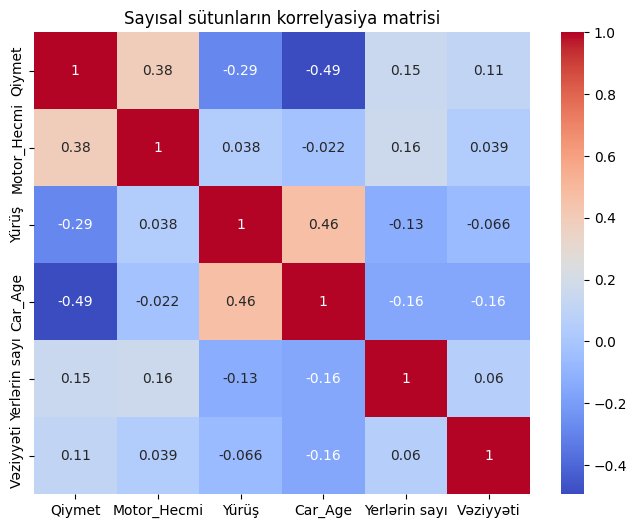

In [184]:
num_cols = ["Qiymet", "Motor_Hecmi", "Yürüş", "Car_Age", "Yerlərin sayı", "Vəziyyəti"]
corr = data[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Sayısal sütunların korrelyasiya matrisi")
plt.show()


In [185]:
corr_with_target = data.corr()["Qiymet"].sort_values(ascending=False)
print(corr_with_target)

Qiymet                              1.000000
Ötürücü_Tam                         0.441042
Motor_Hecmi                         0.381790
Ban növü_Offroader / SUV            0.370552
Rəng_Qara                           0.232964
Yerlərin sayı                       0.153054
Yanacaq_Novu_Plug-in Hibrid         0.122516
Vəziyyəti                           0.110141
Yanacaq_Novu_Elektro                0.103766
Ban növü_Rodster                    0.085777
Yanacaq_Novu_Hibrid                 0.047141
Ban növü_Dartqı                     0.039145
Rəng_Boz                            0.034349
Ban növü_Kupe                       0.026595
Yanacaq_Novu_unknown                0.023175
Ban növü_Pikap                      0.008805
Ban növü_Kabriolet                  0.002711
Rəng_Narıncı                        0.002188
Ban növü_Kvadrosikl                 0.000122
Ban növü_Van                       -0.004676
Sürətlər qutusu_Robotlaşdırılmış   -0.004679
Ban növü_Moped                     -0.010320
Rəng_Qəhvə

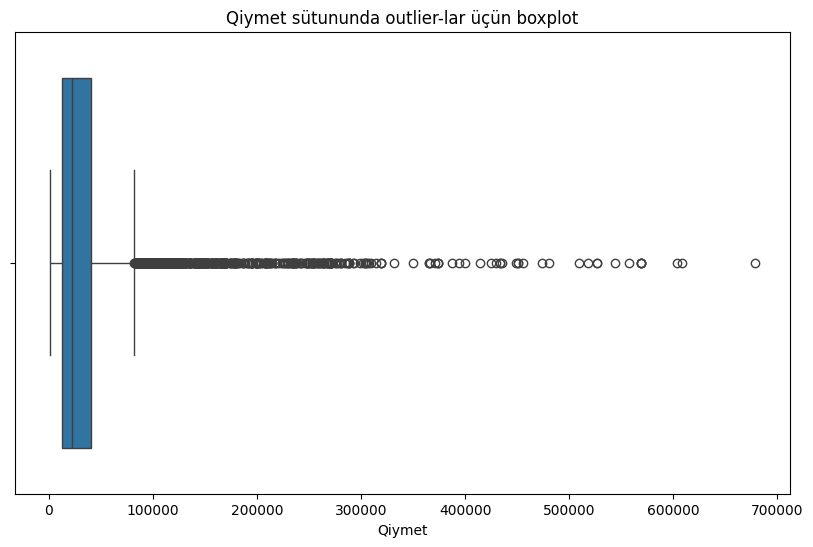

In [192]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Qiymet'])
plt.title('Qiymet sütununda outlier-lar üçün boxplot')
plt.show()

In [194]:
from scipy import stats

z_scores = stats.zscore(data['Qiymet'])
outliers_z = data[(np.abs(z_scores) > 3)]
print(f"Z-score ilə tapılan outlier sayi: {outliers_z.shape[0]}")


Z-score ilə tapılan outlier sayi: 201


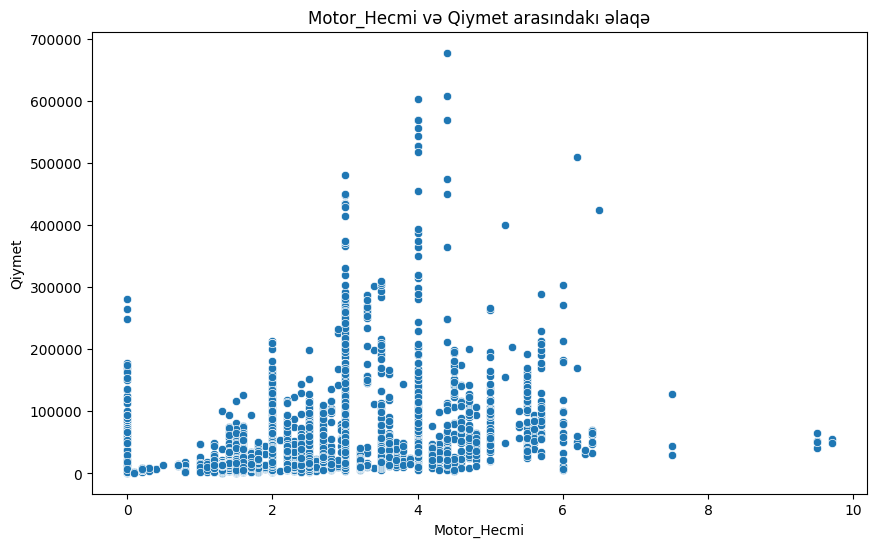

In [195]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Motor_Hecmi'], y=data['Qiymet'])
plt.title('Motor_Hecmi və Qiymet arasındakı əlaqə')
plt.show()

In [197]:
from scipy.spatial import distance

def mahalanobis(x=None, data=None, cov=None):
    x_mu = x - np.mean(data, axis=0)
    if cov is None:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

features = ['Qiymet', 'Motor_Hecmi', 'Yürüş']
data_features = data[features]
data_features = data_features.dropna()

m_dist = mahalanobis(x=data_features, data=data_features)
threshold = np.percentile(m_dist, 99)  # üst 1% outlier kimi qəbul edək
outliers_multi = data_features[m_dist > threshold]
print(f"Çoxölçülü outlier sayi: {outliers_multi.shape[0]}")

Çoxölçülü outlier sayi: 100


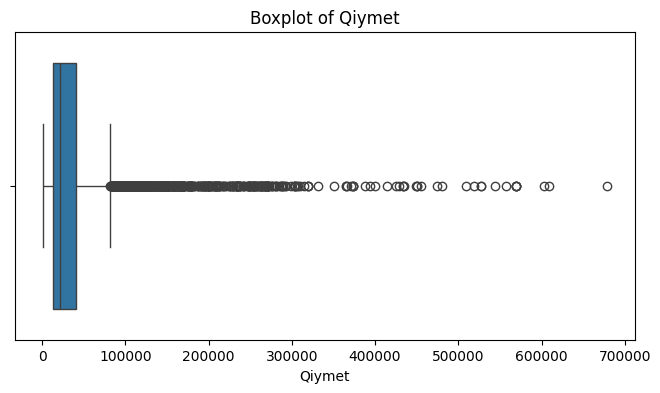

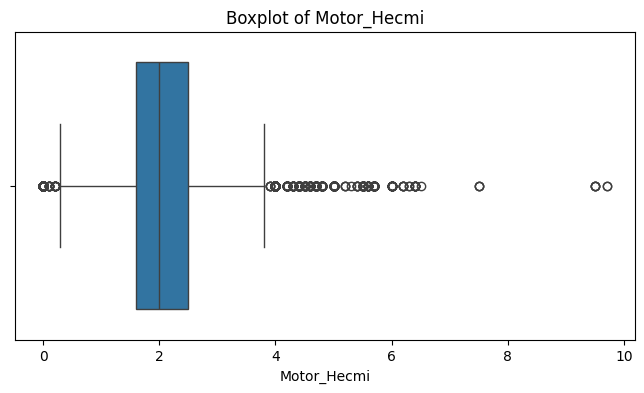

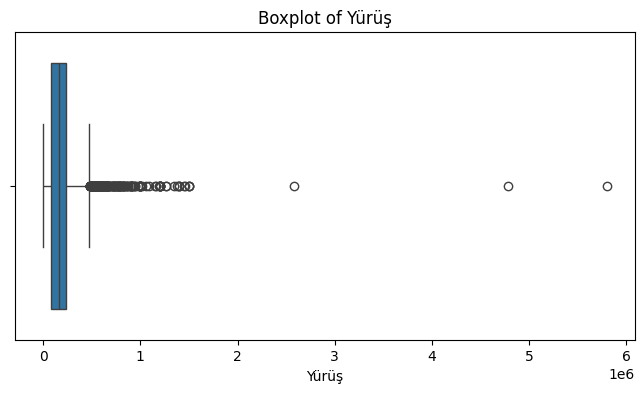

In [198]:

features = ['Qiymet', 'Motor_Hecmi', 'Yürüş']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [205]:
data = data.copy()

lower_limit = data['Qiymet'].quantile(0.01)
upper_limit = data['Qiymet'].quantile(0.99)

data.loc[:, 'Qiymet'] = data['Qiymet'].clip(lower_limit, upper_limit)

print(data['Qiymet'].describe())

count      9951.000000
mean      35162.326977
std       40832.272403
min        2800.000000
25%       12700.000000
50%       21900.000000
75%       40460.000000
max      253145.937500
Name: Qiymet, dtype: float64


In [206]:
print("Old min:", data['Qiymet'].min())
print("Old max:", data['Qiymet'].max())

Old min: 2800.0
Old max: 253145.9375


Modelling

In [207]:
target = 'Qiymet'

useful_features = [
    'Ötürücü_Tam',
    'Motor_Hecmi',
    'Ban növü_Offroader / SUV',
    'Rəng_Qara',
    'Yerlərin sayı',
    'Yanacaq_Novu_Plug-in Hibrid',
    'Vəziyyəti',
    'Yanacaq_Novu_Elektro',
    'Ötürücü_Ön',
    'Yürüş',
    'Sürətlər qutusu_Mexaniki',
    'Car_Age',
    'Ban növü_Sedan',
    'Brand_Model_FE'
]

X = data[useful_features]
y = data[target]

In [208]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")


xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R²: {r2_xgb:.2f}")


Random Forest RMSE: 14246.30
Random Forest R²: 0.89
XGBoost RMSE: 13232.01
XGBoost R²: 0.91


In [209]:
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

param_dist_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train, y_train)

print("Best parameters:", random_search_xgb.best_params_)
print("Best RMSE:", -random_search_xgb.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0.01, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.8}
Best RMSE: 10002.289462747436
